In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [2]:
# Loadig the Dataset
conn=sqlite3.connect('inventory.db')    # creating database connection

df=pd.read_sql_query("select * from vendor_sales_summary",conn)  # fetching vendor summary data
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
df.describe().T # .T was used to transpose

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [4]:
# Mode for each numerical column

mode_value= df.mode().iloc[0]
print("\nMode values of each numerical column:\n\n", mode_value)


Mode values of each numerical column:

 VendorNumber                            4425.0
VendorName               MARTIGNETTI COMPANIES
Brand                                      809
Description                   Southern Comfort
PurchasePrice                             6.53
ActualPrice                               9.99
Volume                                   750.0
TotalPurchaseQuantity                     12.0
TotalPurchaseDollars                     95.28
TotalSalesQuantity                        12.0
TotalSalesDollars                          0.0
TotalSalesPrice                            0.0
TotalExciseTax                             0.0
FreightCost                          144929.24
GrossProfit                             -106.8
ProfitMargin                              -inf
StockTurnover                              1.0
SalesToPurchaseRatio                       0.0
Name: 0, dtype: object


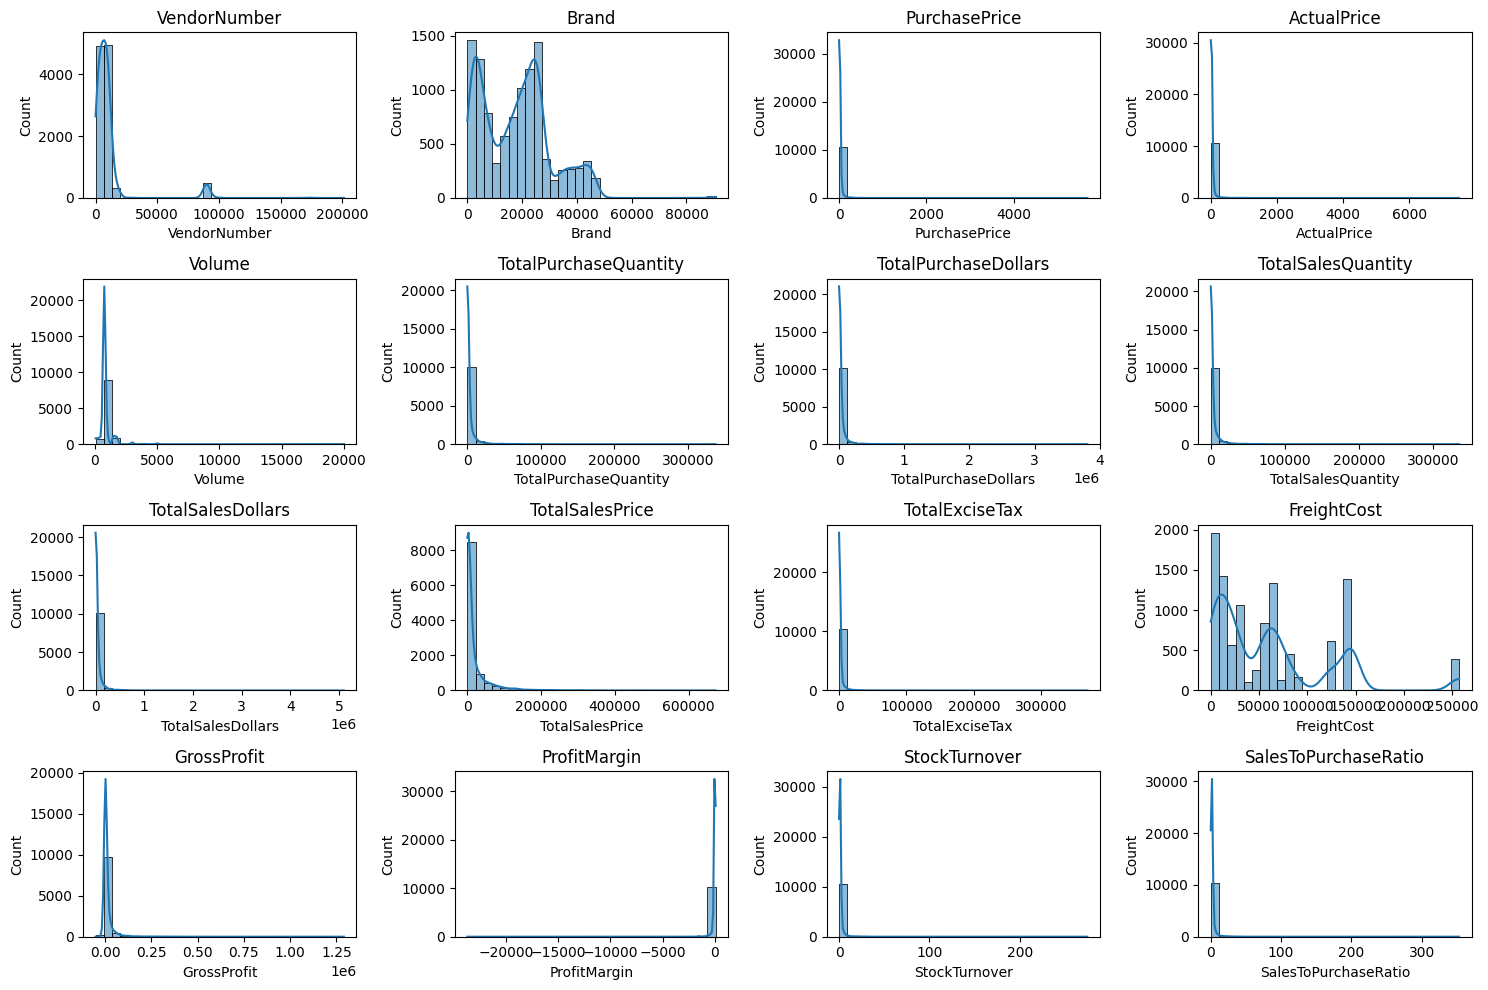

In [5]:
# Distribution Plots for Numerical Columns
numerical_col=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)  # bins = 30 used for  “Divide the data range into 30 equal-width intervals, and count how many values fall into each.”
    plt.title(col)

plt.tight_layout()
plt.show()

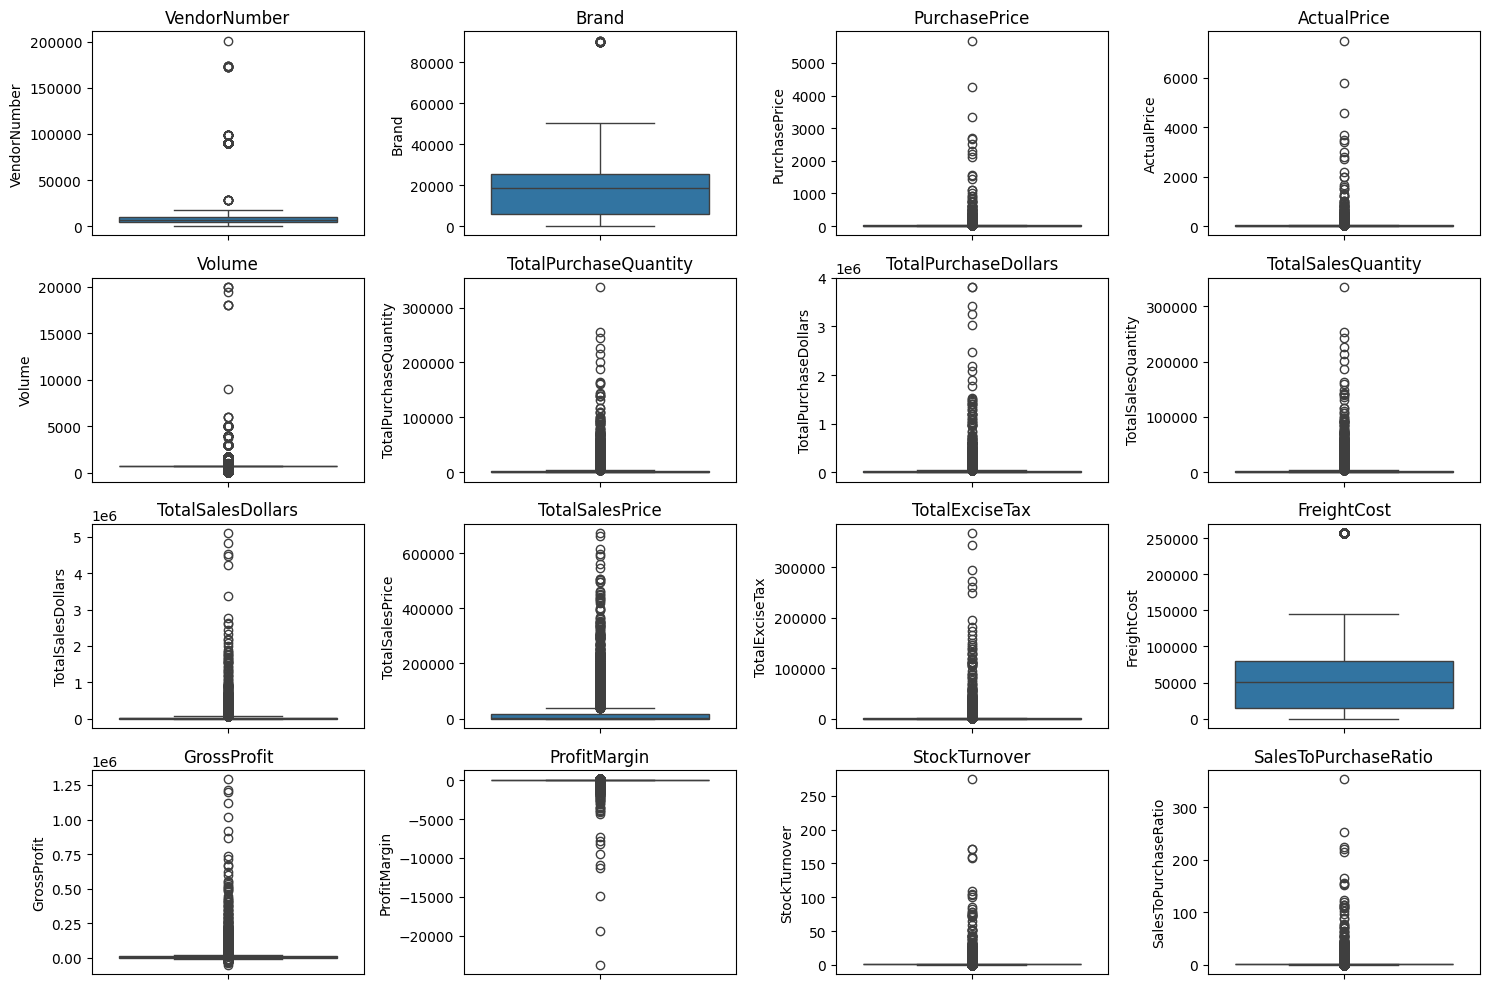

In [6]:
#  Boxplots to find Outlier Detection

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Summary
**Negative & Zero Values:**
- Gross Profit: Minimum value is - 52002.78, which indicates losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: It has a minimum of -$\infty$, which indicates where revenue is zero or even lower than Production costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were bought but never sold. These could be slow moving or obsolete stock.

**Outliers Incated by High Standard Deviations:**
- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
# Filter data by removing inconsistancy
df=pd.read_sql_query("""Select * from vendor_sales_summary where GrossProfit>0 and ProfitMargin >0 and TotalSalesQuantity> 0""",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8565.0,10107.041331,17634.685420,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8565.0,17614.046468,12945.503736,5.800000e+01,5376.000000,17601.000000,24935.000000,9.063100e+04
PurchasePrice,8565.0,21.779365,81.185007,3.600000e-01,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8565.0,32.295213,112.414374,4.900000e-01,9.990000,14.990000,25.990000,4.559990e+03
Volume,8565.0,864.406480,724.230365,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8565.0,3771.571395,12276.310633,1.000000e+00,42.000000,431.000000,2666.000000,3.376600e+05
TotalPurchaseDollars,8565.0,35883.087602,136715.560071,7.100000e-01,545.490000,5017.200000,26600.610000,3.811252e+06
TotalSalesQuantity,8565.0,3748.547577,12125.055208,1.000000e+00,62.000000,490.000000,2675.000000,3.349390e+05
TotalSalesDollars,8565.0,51536.284564,186061.452634,1.980000e+00,1349.850000,8482.220000,40613.050000,5.101920e+06
TotalSalesPrice,8565.0,22756.625624,49303.003032,9.900000e-01,584.610000,4549.650000,22595.120000,6.728193e+05


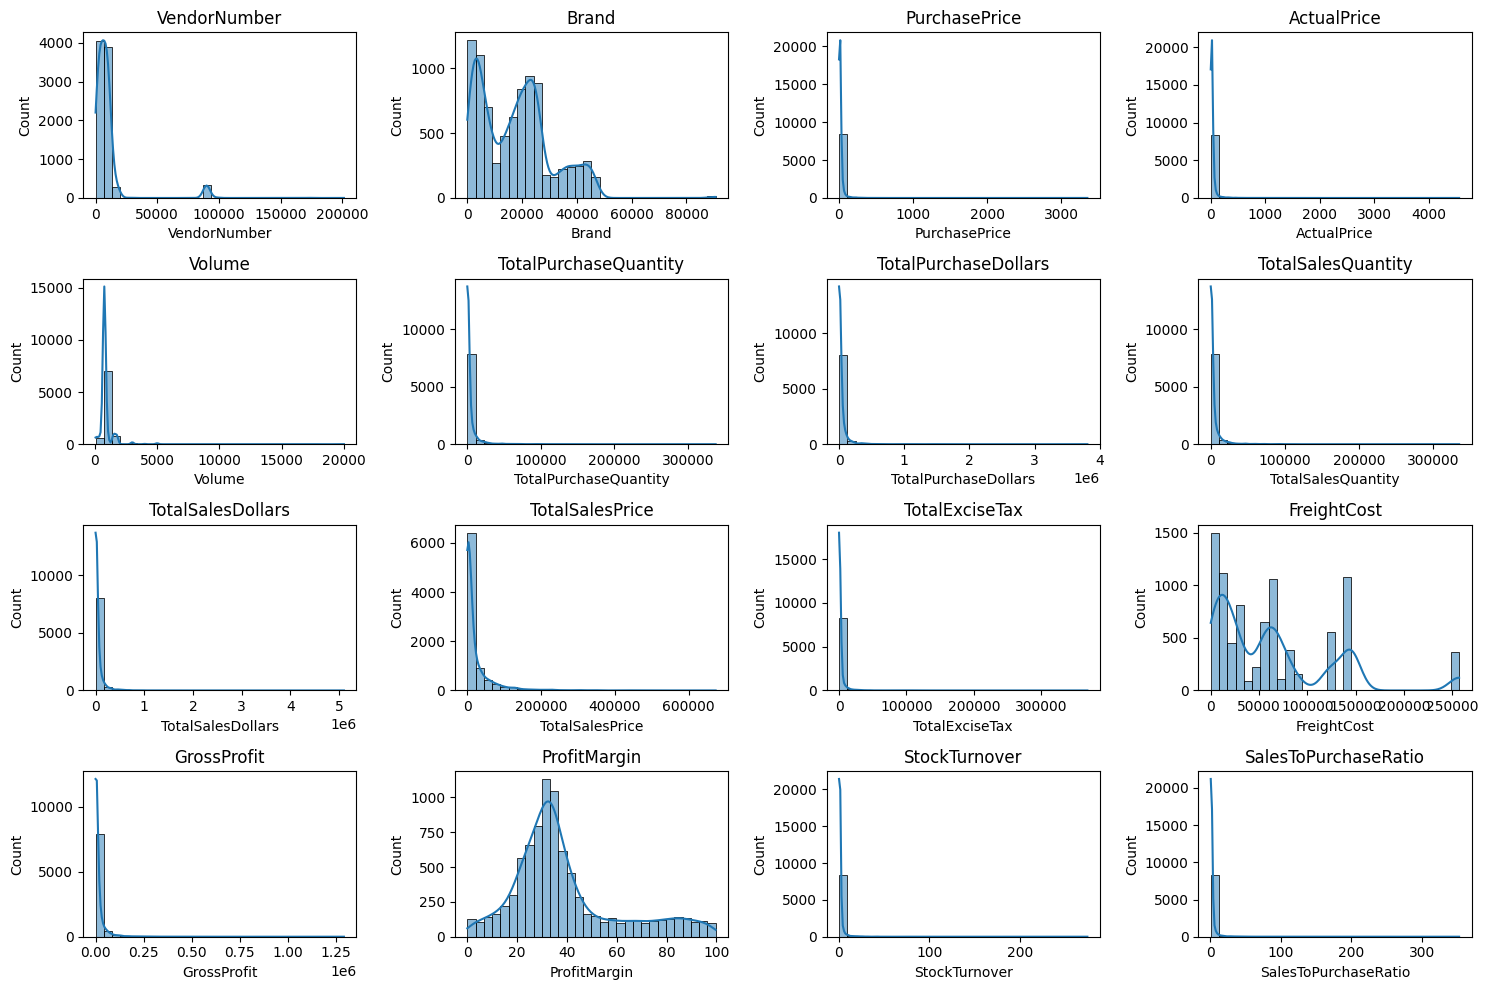

In [9]:
# Distribution Plots for Numerical Columns
numerical_col=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1)     # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)  # bins = 30 used for  “Divide the data range into 30 equal-width intervals, and count how many values fall into each.”
    plt.title(col)

plt.tight_layout()
plt.show()

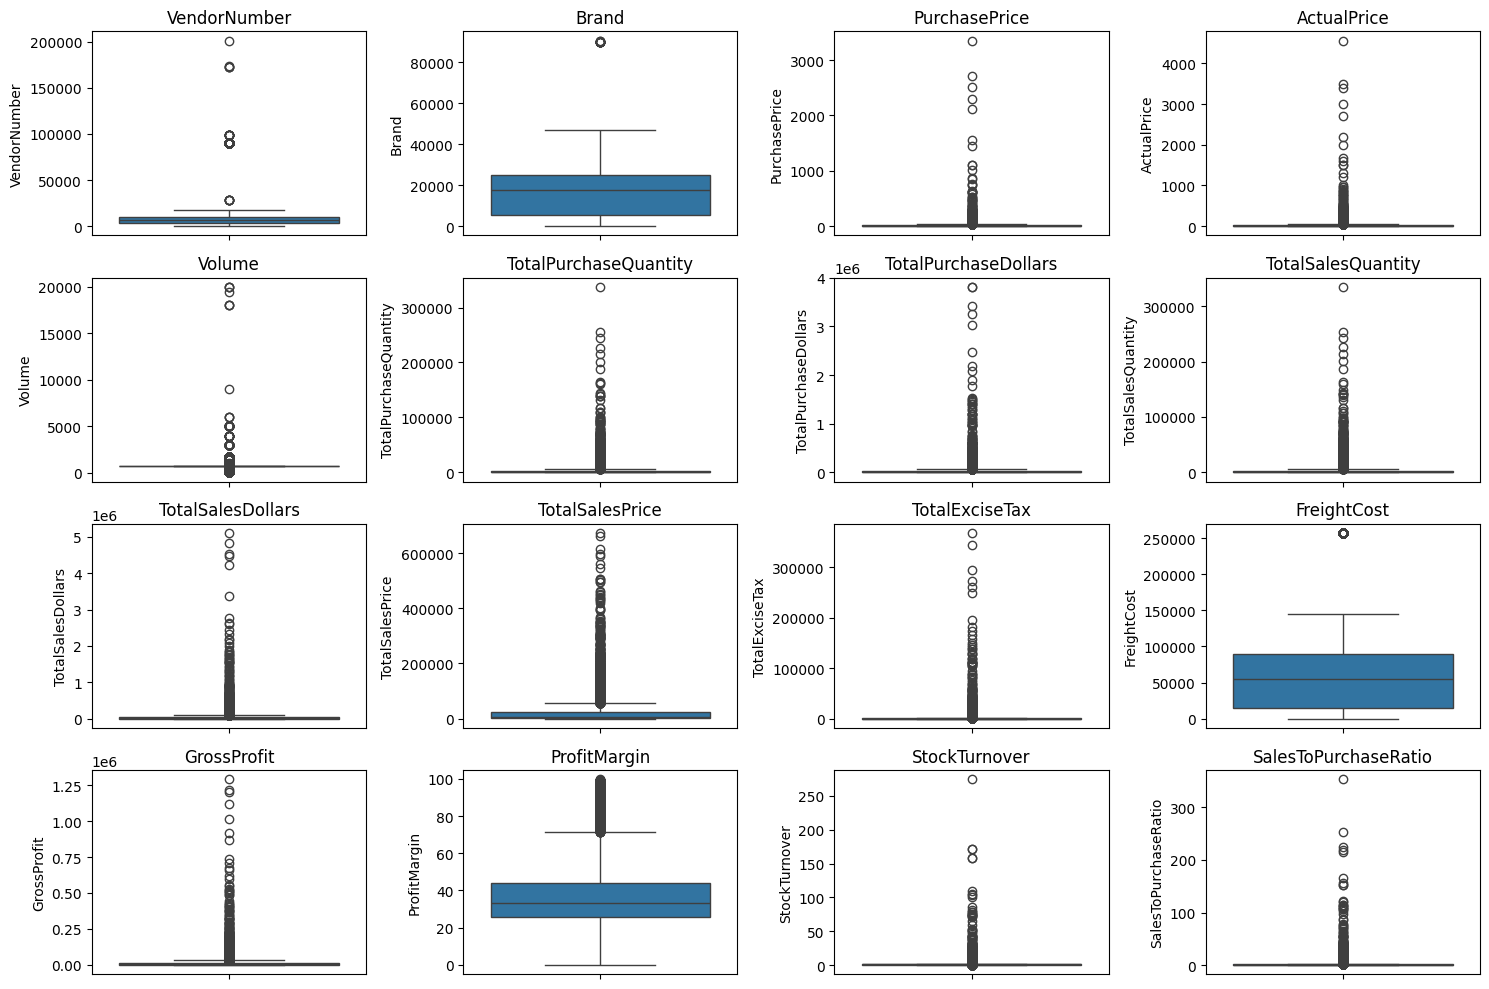

In [10]:

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

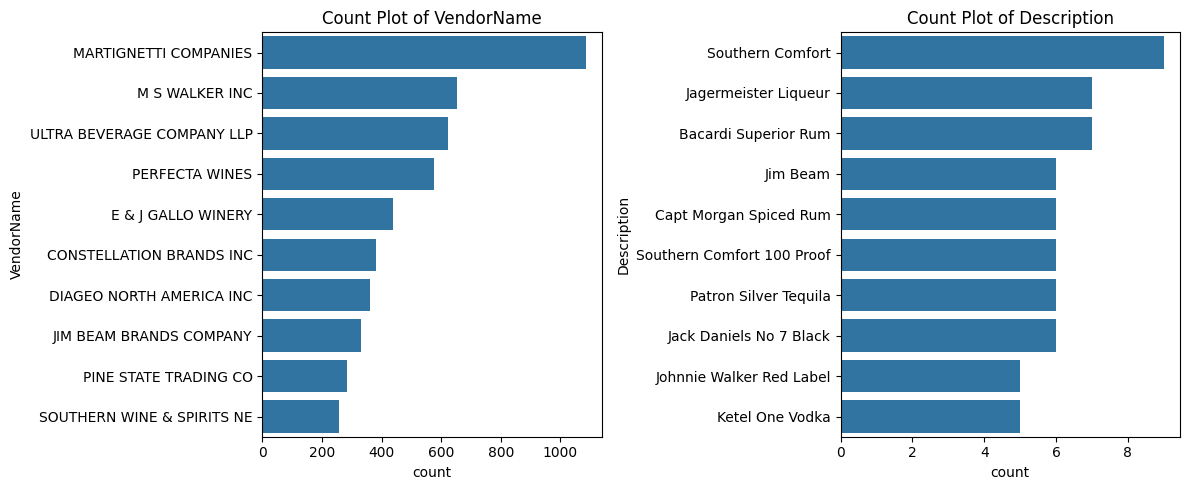

In [11]:
# Count Plots for Categorical Columns

categorical_col= ['VendorName', 'Description']

plt.figure(figsize=(12,5))

for i , col in enumerate(categorical_col):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # index[:10] --> to find the Top 10 categories
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

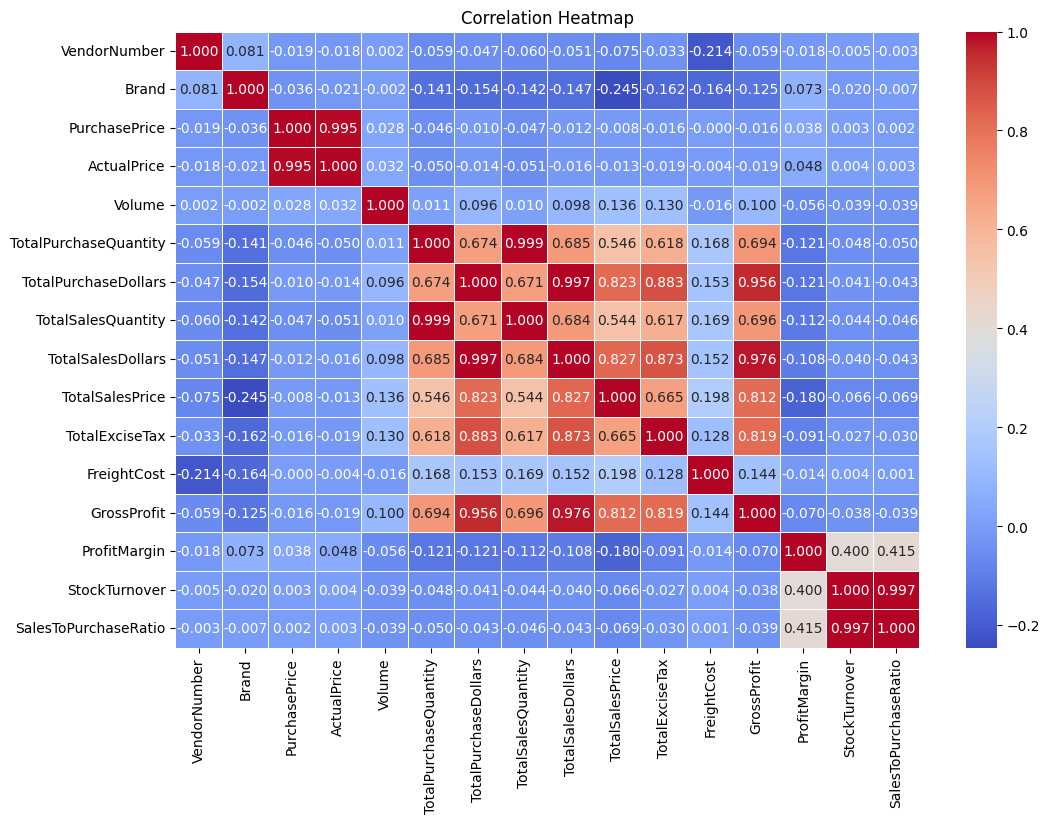

In [12]:
# Correlation Heatmap

plt.figure(figsize=(12,8))

correlation_matrix =  df[numerical_col].corr()
sns.heatmap(correlation_matrix, annot=True, fmt= ".3f", cmap= 'coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Correlation measures:
# +1.0 → perfect positive relationship
# 0.0 → no relationship
# –1.0 → perfect negative relationship

# Color meanings:
# Dark red = strong positive correlation
# Dark blue = strong negative correlation
# Light colors = weak or no correlation

# Insights from Correlation Heatmap

- PurchasePrice has a weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not sigificantly impacts sales revenue.
- Strong Correlation between total purchase quantity and total sales quantity (0.999), defines efficient inventory turnover.
- Negative correlation between profit margin and total sales price 

# Data Analysis

#### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
brand_performance= df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin':'mean'}).reset_index()

In [14]:
low_sales_threshold= brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold= brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

np.float64(560.299)

In [16]:
high_margin_threshold

np.float64(64.97017552750111)

In [17]:
target_brands= brand_performance[
    (brand_performance['TotalSalesDollars']<= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


# 1:17 min

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [18]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<10000]  # for better visualization

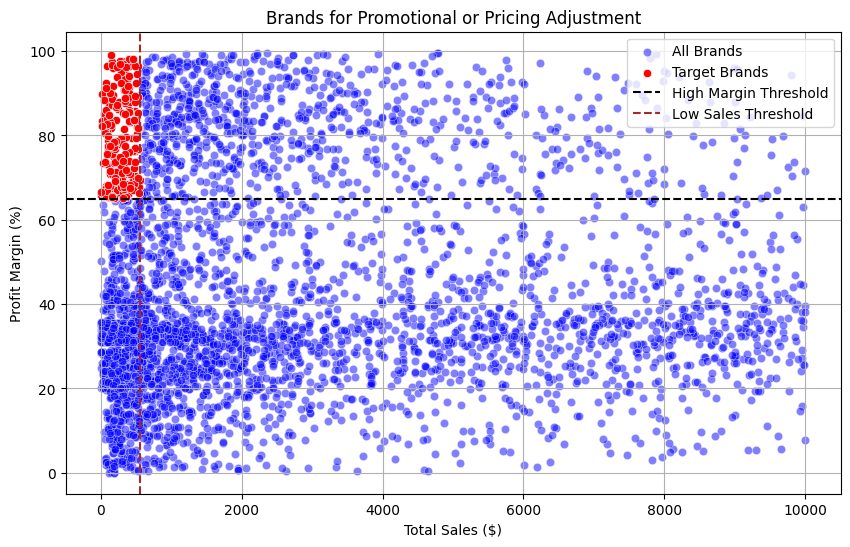

In [19]:
# Scatter Plot

plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x= 'TotalSalesDollars', y= 'ProfitMargin', color='Blue', label='All Brands', alpha=0.5)
sns.scatterplot(data= target_brands, x= 'TotalSalesDollars', y= 'ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle= '--', color= 'black', label= "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle= '--', color= 'brown', label= "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def format_dollars(value):
    if value >= 1000000:
        return f"{value / 1000000:.2f}M"
    elif value>= 1000:
        return f"{value/1000:.2f}k"
    else:
        return str(value)

#### Which vendors and brands demonstrate the highest sales performance?

In [21]:
# Top Vendors & Brands by Sales Performance

top_vendors= df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands= df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)


In [22]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

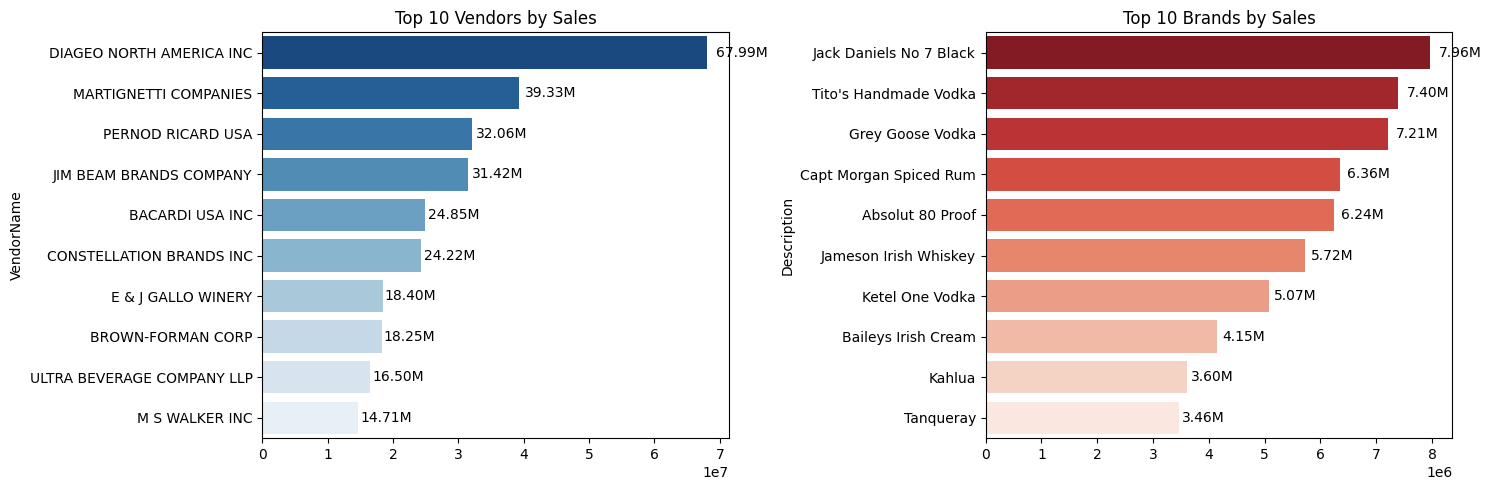

In [23]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

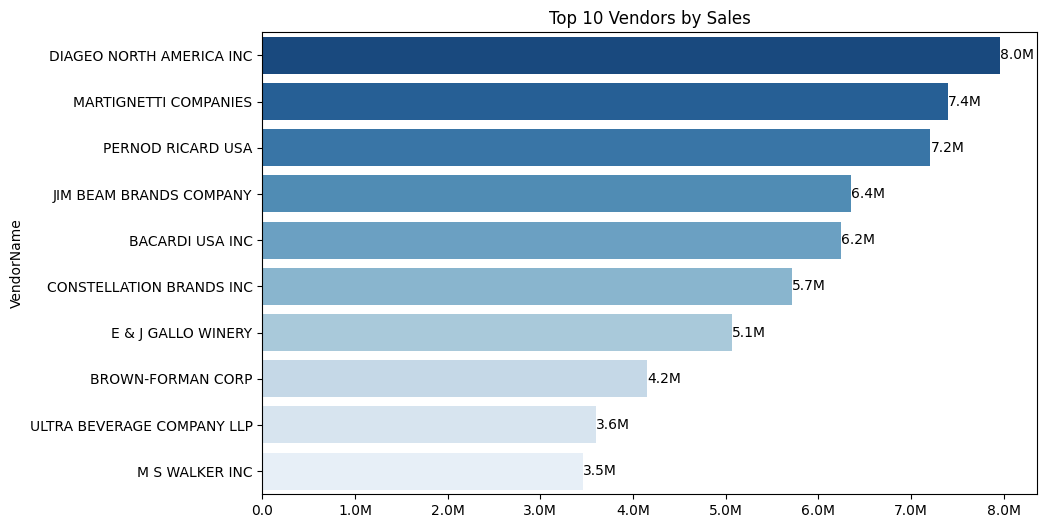

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_brands.values, 
    y=top_vendors.index, 
    palette='Blues_r'
)
plt.title('Top 10 Vendors by Sales')

def format_dollars(n):
    if n >= 1_000_000:
        return f"{n/1_000_000:.1f}M"
    elif n >= 1_000:
        return f"{n/1_000:.1f}K"
    return str(n)

def add_labels(values):
    for i, v in enumerate(values):
        plt.text(v, i, format_dollars(v), va='center')

add_labels(top_brands.values)

# Format x-axis ticks too:
import matplotlib.ticker as tkr
plt.gca().xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: format_dollars(x)))

plt.show()


### Which vendors contribute the most to total purchase dollars?

In [25]:
# Rank Vendors by Total Purchase Dollars

vendor_prformance= df.groupby('VendorName').agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    'TotalSalesDollars':'sum'
}). reset_index()

# Calculate Contribution % to Overall Procurement

vendor_prformance["Purchase_Contribution%"] = (vendor_prformance["TotalPurchaseDollars"]/ vendor_prformance['TotalPurchaseDollars'].sum()) *100

# Rank Vendors by Total Purchase Dollars & Profitability

vendor_prformance= round(vendor_prformance.sort_values(by='TotalPurchaseDollars',ascending=False),2)

# Display Top 10 Vendors

top_vendors= vendor_prformance.head(10)
top_vendors['TotalSalesDollars']= top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']= top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']= top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.1M,17.9M,68.0M,16.30
57,MARTIGNETTI COMPANIES,25.5M,13.8M,39.3M,8.30
68,PERNOD RICARD USA,23.9M,8.2M,32.1M,7.76
46,JIM BEAM BRANDS COMPANY,23.5M,7.9M,31.4M,7.64
6,BACARDI USA INC,17.4M,7.4M,24.9M,5.67
20,CONSTELLATION BRANDS INC,15.3M,8.9M,24.2M,4.97
11,BROWN-FORMAN CORP,13.2M,5.0M,18.2M,4.31
30,E & J GALLO WINERY,12.1M,6.3M,18.4M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.2M,5.3M,16.5M,3.63
53,M S WALKER INC,9.8M,4.9M,14.7M,3.18


In [26]:
top_vendors['Purchase_Contribution%'].sum()  # it represents that top 10 vendors contributes 65.69% of total purchase

np.float64(65.69000000000001)

In [27]:
vendor_prformance["Purchase_Contribution%"].cumsum()  # Cumulative sum

25     16.30
57     24.60
68     32.36
46     40.00
6      45.67
       ...  
33     99.99
107    99.99
85     99.99
16     99.99
35     99.99
Name: Purchase_Contribution%, Length: 119, dtype: float64

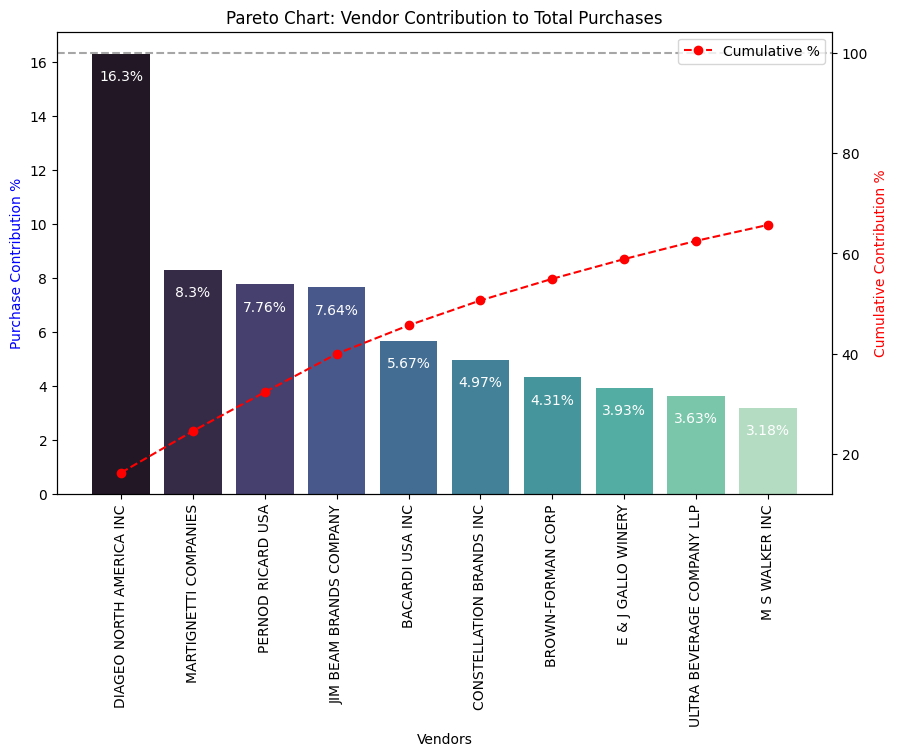

In [28]:
top_vendors['Cumulative_Contribution%']=top_vendors['Purchase_Contribution%'].cumsum()

fig,ax1= plt.subplots(figsize=(10,6))
# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y= top_vendors['Purchase_Contribution%'], palette= 'mako', ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value -1, str(value)+'%', ha= 'center', fontsize=10, color = 'white')

# Line plot for Cumulative Contribution%abs

ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],  top_vendors['Cumulative_Contribution%'], color='red',  marker= 'o', linestyle='--', label='Cumulative %')


ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()



### How much of total procurement is dependent on the top vendors?

In [29]:
print(f"Total Purchase Contribution of Top 10 Vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)}%")

Total Purchase Contribution of Top 10 Vendors is 65.69%


Total Purchase Contribution of top 10 vendors is 65.69 %


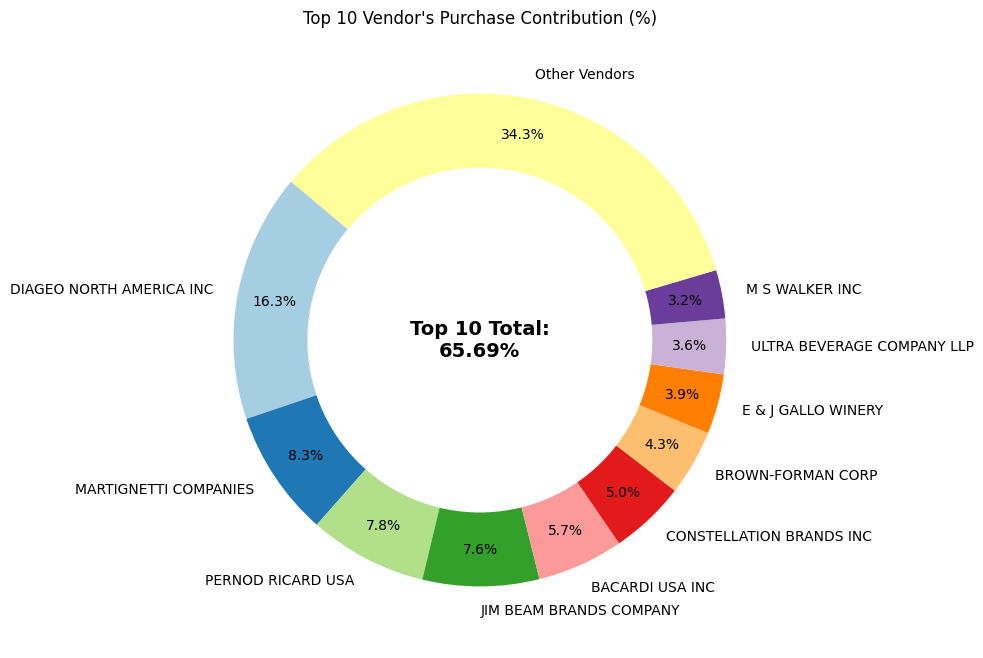

In [30]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

The remaining vendors contribute only 34.31%, meaning they are not utilized effectively or may not be as competitive.
If vendor dependency is too high, consider identifying new suppliers to reduce risk.

#### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [31]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df['UnitPurchasePrice']= df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']


In [32]:
# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df['OrderSize']= pd.qcut(df['TotalPurchaseQuantity'], q=3, labels= ['Small', 'Medium', 'Large'])

In [33]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [34]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


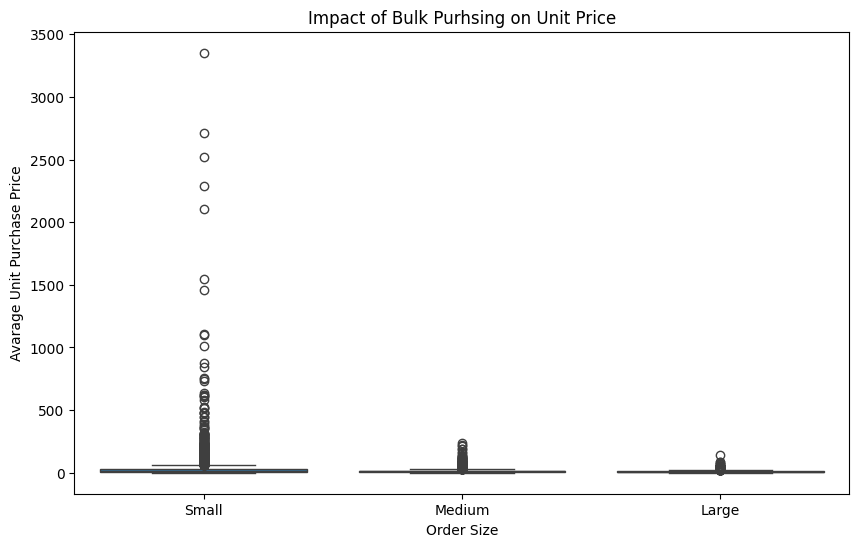

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice')
plt.title("Impact of Bulk Purhsing on Unit Price")
plt.xlabel('Order Size')
plt.ylabel('Avarage Unit Purchase Price')
plt.show()

# Analysis 
- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [36]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)



# #
#
#
#
#
#
#
#
#

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [37]:


# Identify Low Inventory Turnover Vendors
low_turnover_vendors = df[df["StockTurnover"] < 1].groupby("VendorName")["StockTurnover"].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by="StockTurnover", ascending=True)
low_turnover_vendors.head(10)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
78,SMOKY QUARTZ DISTILLERY LLC,0.783835
90,TAMWORTH DISTILLING,0.797078
91,THE IMPORTED GRAPE LLC,0.807569
101,WALPOLE MTN VIEW WINERY,0.820548


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [38]:
# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: 2.7M


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.2K
46,JIM BEAM BRANDS COMPANY,554.7K
68,PERNOD RICARD USA,470.6K
116,WILLIAM GRANT & SONS INC,402.0K
30,E & J GALLO WINERY,228.3K
79,SAZERAC CO INC,198.4K
11,BROWN-FORMAN CORP,177.7K
20,CONSTELLATION BRANDS INC,133.6K
61,MOET HENNESSY USA INC,126.5K
77,REMY COINTREAU USA INC,118.6K


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


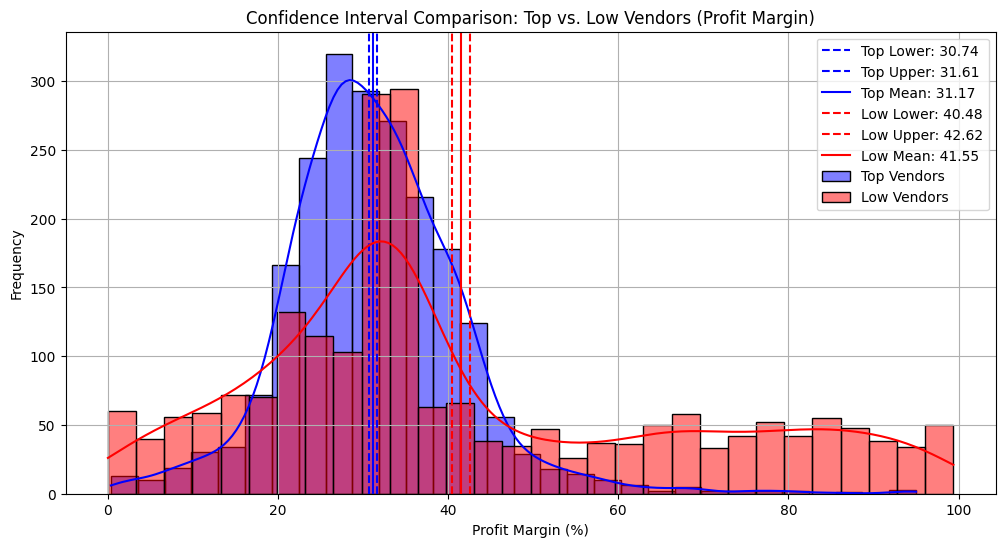

In [39]:
# Define top and low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.